In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from tqdm.notebook import tqdm
plt.rcParams["font.family"] = 'Hiragino Sans'
plt.rcParams["font.size"] = 25

In [4]:
traj = abs(np.load("../generated_lam/generated_laminar_beta_0.417nu_0.00018_dt0.01_50000period1300check200progresseps0.05.npy"))
traj2 = abs(np.load("../traj/beta0.417_nu0.00018_100000period.npy"))

## 2軸プロット

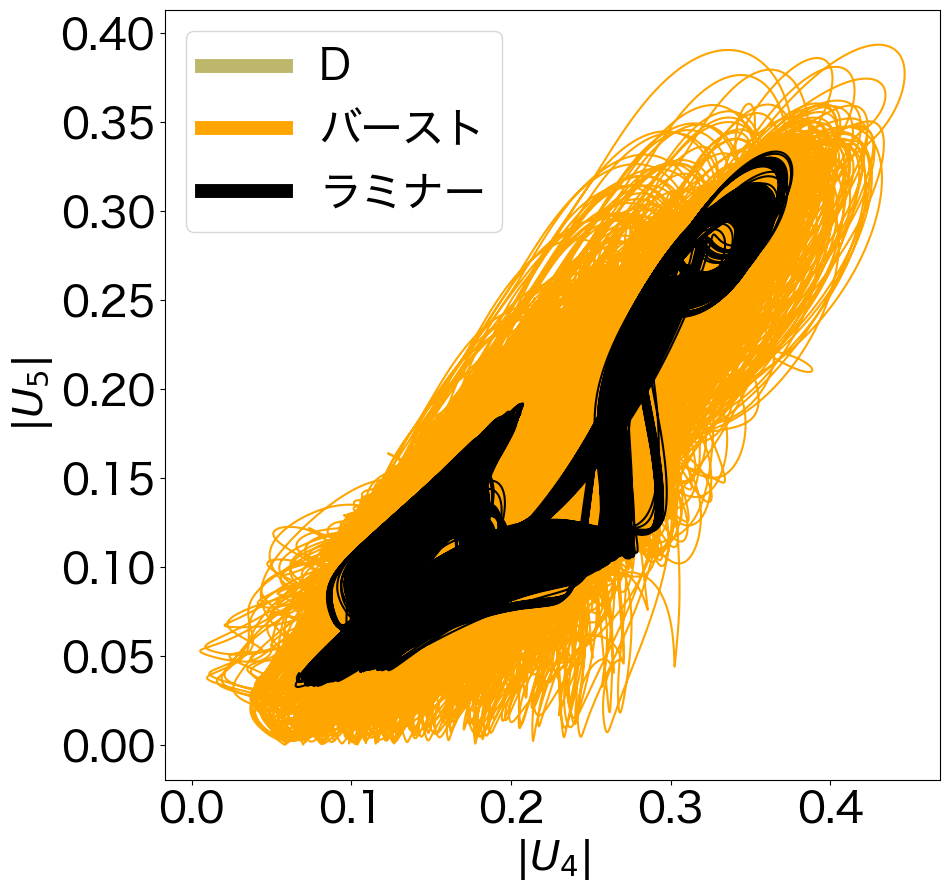

In [13]:
plotDim1 = 4
plotDim2 = 5
start = 0
end = -1
skip = 1

plt.figure(figsize=(10, 10))
plt.plot([0.2], [0.2], c="darkkhaki", label="D", alpha=1)
plt.plot(traj2[plotDim1-1,:], traj2[plotDim2-1,:], c="orange", label="バースト")
plt.plot(traj[plotDim1-1,:], traj[plotDim2-1,:], c="black", label="ラミナー")

plt.xlabel(fr"$|U_{plotDim1}|$")
plt.ylabel(fr"$|U_{plotDim2}|$")
legend = plt.legend(fontsize=30, loc="upper left")
for line in legend.get_lines():
    line.set_linewidth(10.0)

## 分岐図の描画

0it [00:00, ?it/s]

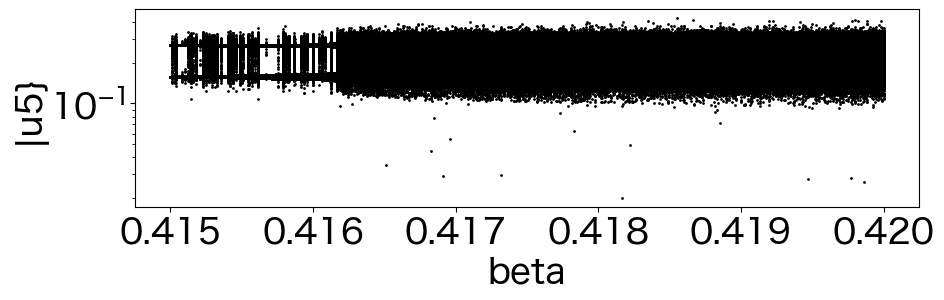

In [2]:
filename = "../bif_data/bif_0.415to0.42_nu0.00018to0.00018_480steps_period100000_dump10000.txt"

#プロットの設定
fig = plt.figure(figsize=(10,15))

spec = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[4, 1, 1])

# ax1 = fig.add_subplot(spec[0],projection='3d')
# ax1.set_xlabel("beta")
# ax1.set_ylabel("nu(log10)")
# ax1.set_zlabel("|u5|(log10)")

ax2 = fig.add_subplot(spec[1])
ax2.set_xlabel("beta")
ax2.set_ylabel("|u5}")
ax2.set_yscale("log")
ax2.xaxis_inverted()

# ax3 = fig.add_subplot(spec[2])
# ax3.set_xlabel("nu")
# ax3.set_ylabel("|u5|")
# ax3.set_xscale("log")
# ax3.set_yscale("log")

with open(filename, "r") as file:
    for line in tqdm(file):
        parts = line.split()  # 行をスペースで分割
        beta = float(parts[0])  # 1つ目の数値をfloatに変換
        nu = float(parts[1])  # 2つ目の数値をfloatに変換
        values = [float(x) for x in parts[2:]]  # 3つ目以降の数値をfloatに変換してリストに格納
    
    #     #3dプロット
    #     z_list_log = np.log10(z_list)
    #     ax1.scatter([beta_param[i]]*len(z_list),[log_range[i]]*len(z_list),z_list_log, s=1)

        #2dプロット
        ax2.scatter([beta]*len(values),values,s=1, c="black")

        # ax3.scatter([nu]*len(values),values,s=1)

fig.tight_layout()
#fig.savefig(fname=f"../bif_image_for_each_beta_and_nu/nu({nu_param[0]},{nu_param[-1]})_beta({beta_param[0]},{beta_param[-1]})_{runge_para['step']}_{runge_para['period']}_{param_step}cut_{Dimention}dim_latter{round(kaishi/step_number,2)}.png")


## 平均ラミナー継続時間分布

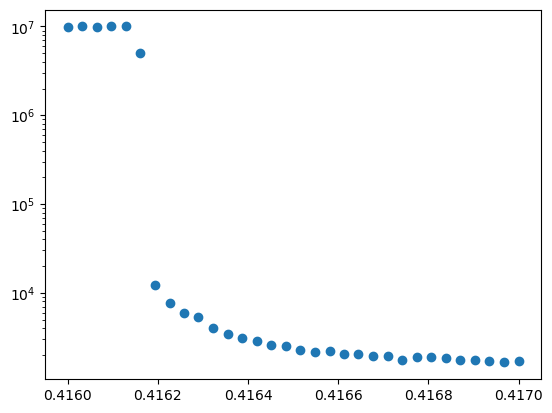

In [10]:
a = np.loadtxt("../average_durations/data/beta0.416001-0.4161_32num_t1e+070.01_window1000.txt")
plt.scatter(a[:, 0], a[:, 1], )
# plt.plot(0, 1e+15)
plt.yscale("log")
# plt.xscale("log")
# plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

## 誤差発展

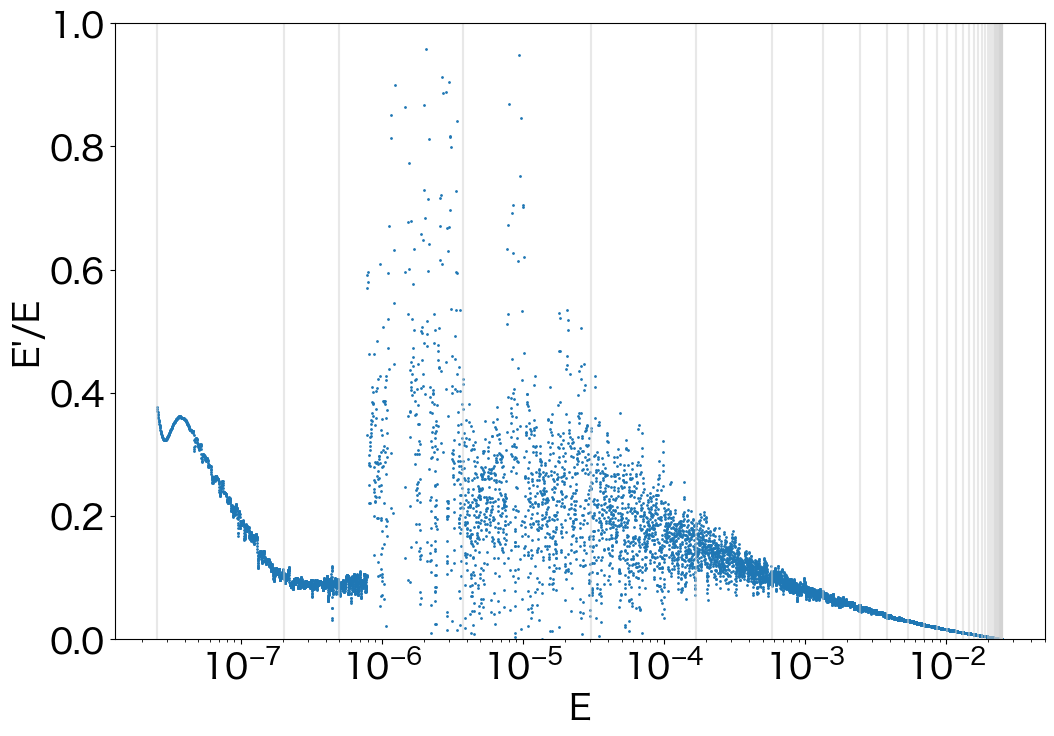

In [5]:
data = np.load("../error_growth/linear_beta0.5nu4e-05t400dt0.01repeat999732sampling1perturbed_dim13.npy")
begin = 100
end = -1
skip = 1

error = data[0,begin:end:skip]
error_growth = data[1,begin:end:skip]
time = data[2,begin:end:skip]

plt.figure(figsize=(12, 8))
# 10秒ごとにerrorをサンプリング，その値の時に薄いグレーで縦線を引く
for i in range(0, int(time[-1]), 10):
    plt.axvline(error[i*100], c="lightgray", alpha=0.5)
plt.scatter(error, error_growth, s=1)
plt.xlabel("E")
plt.ylabel("E'/E")
plt.ylim(0, 1)
plt.xscale("log")

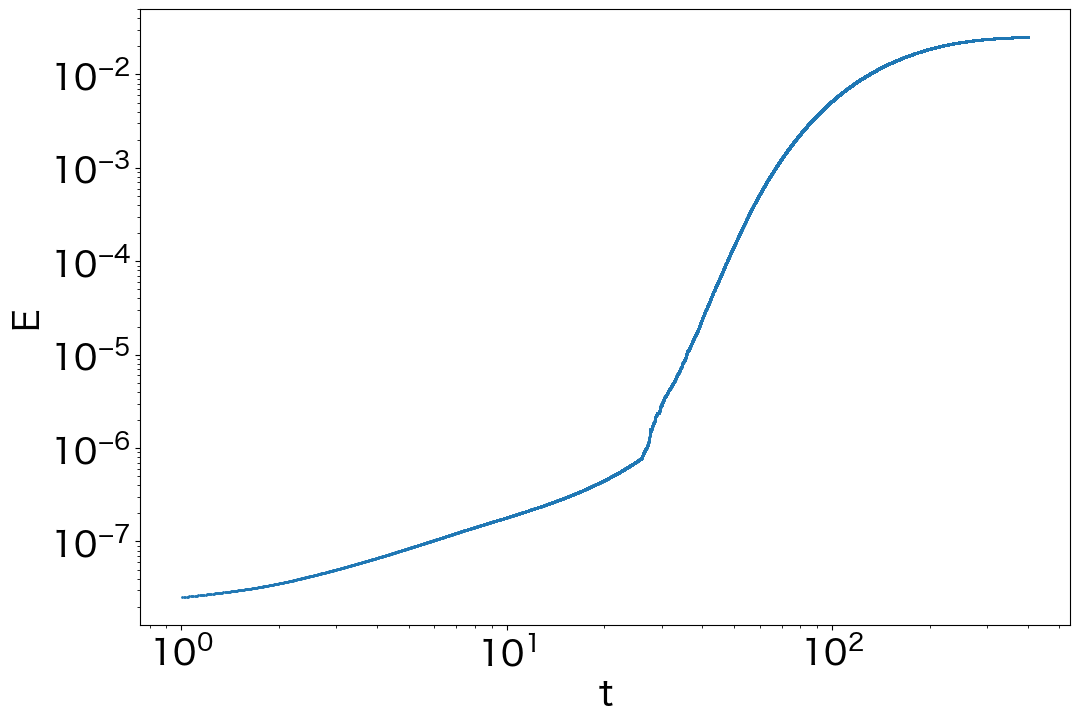

In [6]:
plt.figure(figsize=(12, 8))
plt.scatter(time, error, s=1)
plt.xlabel("t")
plt.ylabel("E")
plt.yscale("log")
plt.xscale("log")

(0.0, 1.0)

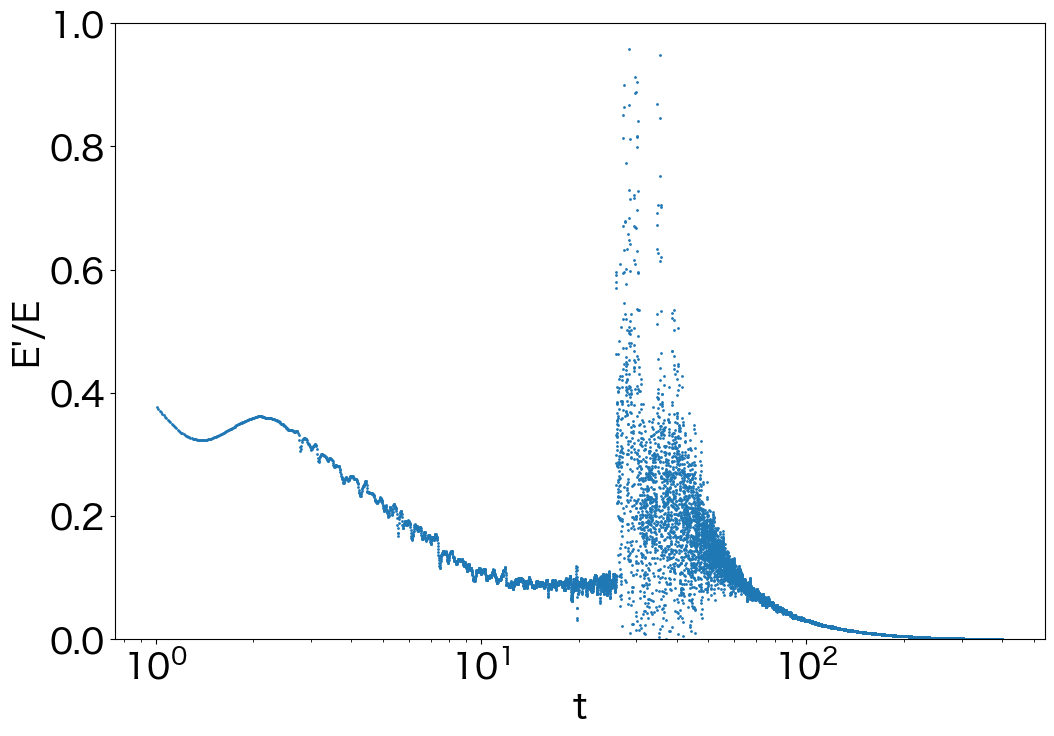

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(time, error_growth, s=1)
plt.xlabel("t")
plt.ylabel("E'/E")
plt.xscale("log")
plt.ylim(0, 1)